## 3.2 Спроектувати i розробити нейронну мережу на основi набору даних Cifar10

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 32 * 32 пікселів.

In [74]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

*Завантаження датасету Cifar10*

### Змінимо розмірність y_train, оскільки він є двовимірним масивом, у якому кожен рядок має лише один елемент. Тож приберемо цю незручність і перетворимо його в одновимірний масив.

In [75]:
print(y_train[:4])
y_train = y_train.reshape(-1,)
print(y_train[:4])

[[6]
 [9]
 [9]
 [4]]
[6 9 9 4]


*Перетворення y_train в одновимірний масив*

### Позначимо індекси для кращого розуміння, що кожне число в y_train означає.

In [76]:
indexes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

*Індекси, тобто імена класів*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

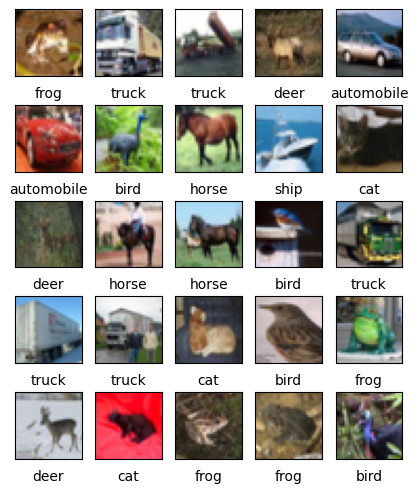

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(indexes[y_train[i]])

*Зображення перших двадцяти п'яти елементів*

### Нормалізовуємо датасет, щоб отримати значення в інтервалі від [0, 1]. Оскільки маємо колір, то треба розділити кожний з елементів на 255.

In [78]:
X_train = X_train / 255
X_test = X_test / 255

*Нормалізація даних*

### За архітектуру моделі оберемо Sequential. Використаємо щільні шари, де кожен нейрон одного шару зв  язаний з нейроном іншого. Прихований шар маює по 64 нейрони. Оскільки у нас є 10 індексів, то і вихідний шар міститиме 10 нейронів.

 ### Функціями активації є relu та softmax. Використаємо Flatten для перетворення багатовимірних вхідних данних до одновимірних. 

### Використаємо паттерн CNN( Convolutional Neural Network ) - це мережа, яка є одним із методів класифікації та розпізнавання зображень у нейронних мережах. Вона призначена для обробки даних кількома шарами масивів. Цей тип нейронної мережі використовується в таких програмах, як розпізнавання зображень. Основна відмінність між CNN та іншими нейронними мережами полягає в тому, що CNN приймає вхідні дані як двовимірний масив. І він працює безпосередньо з зображеннями, а не зосереджується на виділенні ознак, як це роблять інші нейронні мережі.

### Convolutional Neural Networks мають 4 шари: convolutional, relu шар, pooling, fully connected.

### Початковий крок у вилученні функцій із вхідного зображення виконується згортковим шаром( convolutional layer ). Використовуючи вхідну матрицю, згортковий рівень підтримує зв’язок між пікселями під час вивчення характеристик зображення. Цей математичний процес включає два входи: матрицю зображення та ядро або фільтр.

### Функція активації Rectified Linear Unit (ReLU) запускає вузол лише тоді, коли вхід перевищує певний поріг. Коли вхід нижче нуля, вихід дорівнює нулю; однак, як тільки він перевищує поріг, він зберігає лінійний зв'язок із залежною змінною.

### Під час попередньої обробки зображення шар об’єднання( pooling layer ) є ключовим компонентом, який допомагає зменшити параметри зображення, коли воно стає надмірно великим. Це «зменшення масштабу» зображення досягається шляхом об’єднання, яке можна розглядати як стиснення зображення для зменшення його щільності, подібно до його зменшення.

### Максимальне об’єднання( max pooling ) — це процес дискретизації на основі вибірки. Основна мета максимального об’єднання полягає в тому, щоб зменшити масштаб представлення вхідних даних, зменшивши його розмірність і дозволивши зробити припущення щодо функції, що міститься в групуванні підобласті.

In [79]:
from keras import models, layers
network = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),
                  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо оптимізатор, функцію втрат, метрики.

### Використаємо оптимізатор "adam", який працює на основі градієнтного спуску. У якості функції втрат використаємо Sparse Categorical Crossentropy, у якій передбачені ймовірності порівнюються з істинними мітками, де істинні мітки є цілими числами, що відповідають індексу правильного класу. Це на відміну від категоріальної крос-ентропії, де істинні мітки є векторами, закодованими одним способом.

In [80]:
network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі.

In [81]:
network.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-03-24 12:51:51.326782: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


   4/1563 [..............................] - ETA: 1:17 - loss: 2.3103 - accuracy: 0.1562

2023-03-24 12:51:52.578288: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.
2023-03-24 12:51:52.579120: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.
2023-03-24 12:51:52.594929: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 14191200 exceeds 10% of free system memory.


1563/1563 [==============================] - 25s 16ms/step - loss: 1.4395 - accuracy: 0.4836
Epoch 2/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1031 - accuracy: 0.6119
Epoch 3/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9733 - accuracy: 0.6598
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8934 - accuracy: 0.6880
Epoch 5/5
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8298 - accuracy: 0.7111


*Навчання моделі*

### Перевіримо модель на контрольному наборі даних.

In [82]:
test_loss, test_acc = network.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9438 - accuracy: 0.6752


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [83]:
network.save('cifar10.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [84]:
from keras.models import load_model
model = load_model('cifar10.h5')

*Завантаження моделі*

### Покажемо тестові картинки, на яких ми будемо тестувати модель.

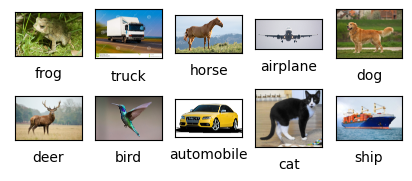

In [85]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
image_names = []
for img_path in glob.glob(  '/home/choleraplague/'\
                            'university/MachineLearning/'\
                            'Lab5/images/cifar10/*.png'):
    image_names.append(img_path.split('/')[-1].split('.')[0])
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(5, 2))
for i, name in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(name)

*Тестові зображення*

### Завантажимо їх в PIL у форматі ndarray. Потім переформатуємо цей масив до розміру, на якому відбувалося тренування нашої моделі.

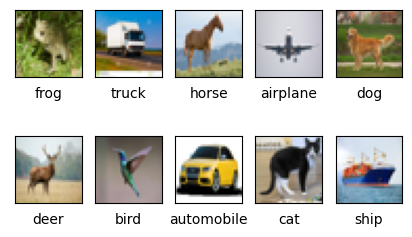

In [86]:
from PIL import Image
import numpy as np

low_images = []

plt.figure(figsize=(5, 3))
for i, im in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tst = Image.open(f'images/cifar10/{im}.png')

    tst_res = tst.resize((32, 32))
    plt.xlabel(im)
    plt.imshow(tst_res)
    pix = np.array(tst_res)
    # pix = pix.reshape((1, 32*32*3))
    pix = pix.astype('float32') / 255
    low_images.append(pix)
low_images = np.array(low_images)

*Обробка зображень*

### Спрогнозуємо результати, провівши тестування моделі.

In [87]:
pred = model.predict(low_images)
pred_indexes = [indexes[i] for i in [np.argmax(el) for el in pred]]
pred_indexes

1/1 [==============================] - 0s 68ms/step


['frog',
 'airplane',
 'bird',
 'airplane',
 'deer',
 'deer',
 'bird',
 'automobile',
 'cat',
 'ship']

*Спрогнозовані результати*